# Clothing-Classifier

Install tf.keras, a high-level API to build and train models in TensorFlow.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


Fashion MNIST is a data set of clothings. Below are 60,000 images to train the network, and 10,000 images to evaluate the accuracy to classify images. Import and load the Fashion MNIST directly from TensorFlow.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We store the class names here since they are not included with the dataset. Each image is mapped to a single label. The labels are an array of integers, ranging from 0 to 9 shown below.   

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring the data
60,000 images in the training set, represented as 28 x 28x pixels per image

In [4]:
train_images.shape

(60000, 28, 28)

Length of training set

In [27]:
len(train_labels)

60000

Integer between 0 and 9:

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

10,000 images in the test set.

In [6]:
test_images.shape

(10000, 28, 28)

# Preprocess the data
Utilizing matploblib (plt) to visualize image; pixel values fall in the range of 0 to 255.

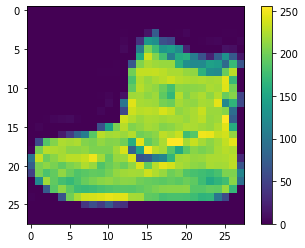

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Display first 25 images with class names from the training set with for loop.

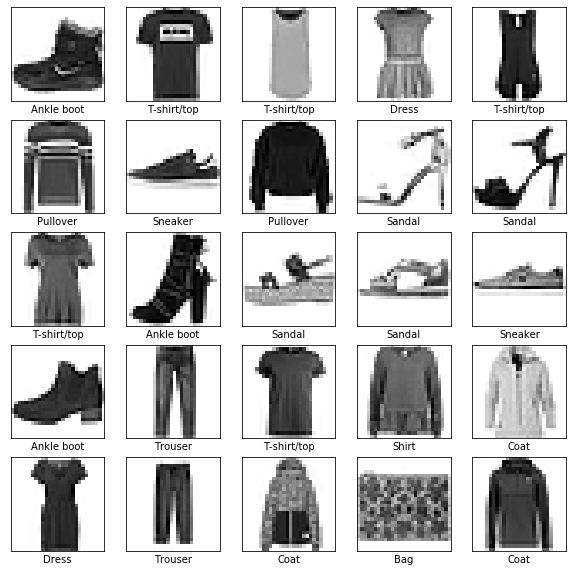

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Need to set up the layers, which is the basic building block of a neural network. 

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile Model
* Needs settings before model is ready for training, which are the loss function, optimizer, and metrics.
    * loss function - easures how accurate the model is during training
    * optimizer - how the model is updated based on the data
    * metrics - monitors the training and testing steps

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.5012 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3750 - accuracy: 0.8638
Epoch 3/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.3364 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3128 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.2963 - accuracy: 0.8913
Epoch 6/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2816 - accuracy: 0.8951
Epoch 7/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2699 - accuracy: 0.8992
Epoch 8/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2578 - accuracy: 0.9031
Epoch 9/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2485 - accuracy: 0.906

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2662 - accuracy: 0.8840

Test accuracy: 0.884


In [14]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([9.86940218e-09, 8.13452694e-10, 1.72310219e-08, 2.15553252e-11,
       6.47039811e-10, 1.19980415e-02, 1.85137350e-09, 1.43404712e-03,
       1.42262584e-08, 9.86567855e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

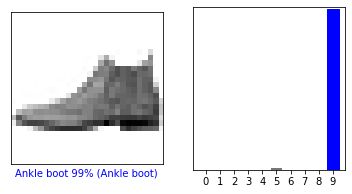

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


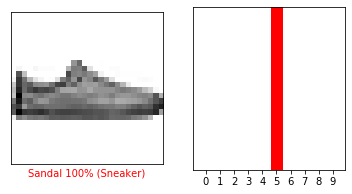

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

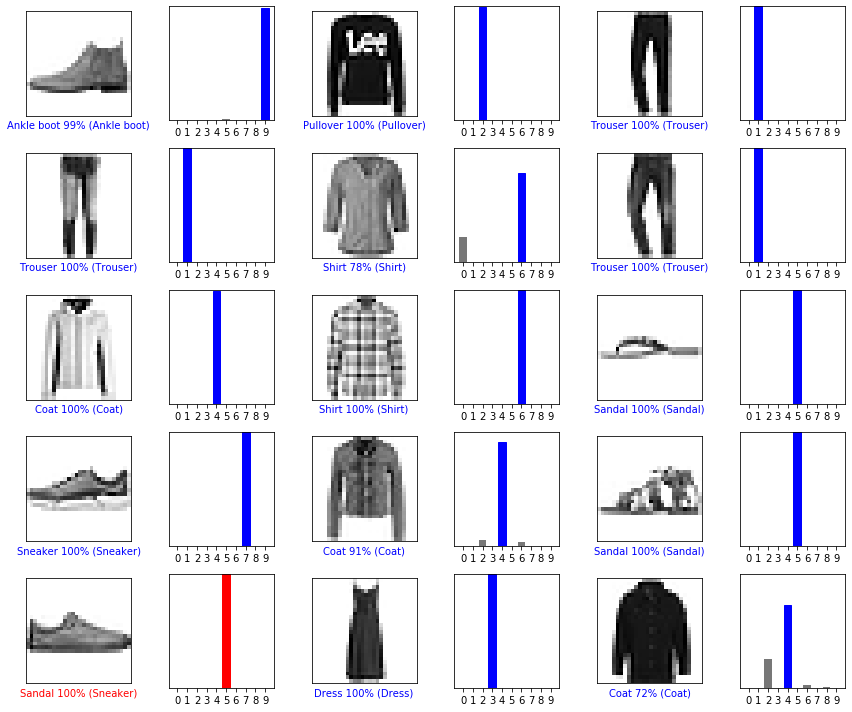

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.5053998e-05 7.6859066e-12 9.9522781e-01 3.1131975e-08 3.3047397e-03
  4.4214955e-13 1.3724152e-03 1.8082268e-14 5.9152949e-09 3.2501232e-13]]


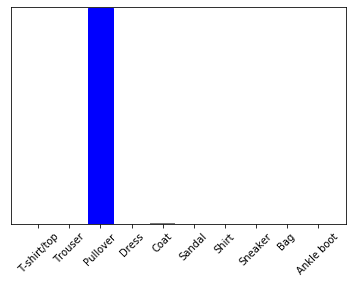

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

2